# 1. Downloading the data



We are using dataset provided by kaggle (https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)

## 1.1. Uploading kaggle api credentials
We upload the kaggle.json file from our computer. That file is created on the account page of your Kaggle profile with Create new API Token button in API section



In [3]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mkulio","key":"3281becbe4bb83fc01e5eadbe4ee695b"}'}

## 1.2. Installing kaggle into google colab
Also, we move kaggle.json file to be in the folder where we download data from kaggle

In [4]:
!pip install -q kaggle

In [6]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

### Exploring data sets in Kaggle. We have a warning.
### Thus, we are going to reinstall to the newest version of kaggle API

In [7]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
vzrenggamani/hanacaraka                                     Aksara Jawa / Hanacaraka                           9MB  2020-07-10 15:09:31             68  
vishnuvarthanrao/windows-store                              Windows Store                                     93KB  2020-07-07 12:29:07           1069  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07            194  
rohanrao/chai-time-data-science                             Chai Time Data Science | CTDS.Show                 3MB  2020-07-23 17:23:46            716  
garystafford/environmental-sensor-data-132k                 Environmental Sensor T

###Reinstaling kaggle

In [8]:
!pip uninstall -y kaggle 
!pip install — upgrade pip 
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
ERROR: Invalid requirement: '—'
     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=03f7536708d8e44c0ec72423df54782bb374e28db930fa292645850dfe2ea47c
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
Kaggle API 1.5.6


## 1.3. Downloading particular dataset

In [9]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 97% 793M/814M [00:14<00:00, 66.6MB/s]
100% 814M/814M [00:14<00:00, 58.3MB/s]


### Again can't download dataset
First we must submit to the competition on the  and accept terms and conditions

In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

403 - Forbidden


In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 801M/814M [00:15<00:00, 64.2MB/s]
100% 814M/814M [00:15<00:00, 55.4MB/s]


# 2. Google colab directory setting up

We train on a small part of the downloaded dataset. We train on first 1000 images.

## 2.1. Creating folders
Our data is a zip file which is now in the content folder of our cloud machine. Like in the book, we create folders:

    cats_and_dogs_small:                            original_data:
          |                                               |
          |----test_dir:                                  |---test_data
                    |---test_cats_dir                     |
                    |---test_dogs_dir                     |---train_data
          |----train_dir
                    |---train_cats_dir
                    |---train_dogs_dir
          |----validation_dir
                    |---validation_cats_dir
                    |---validation_dogs_dir

In [10]:
!ls

dogs-vs-cats-redux-kernels-edition.zip	kaggle.json  sample_data


In [11]:
!mkdir cats_and_dogs_small

In [12]:
%cd cats_and_dogs_small

/content/cats_and_dogs_small


In [12]:
!pwd

/content/cats_and_dogs_small


In [13]:
!mkdir train_dir
!mkdir validation_dir
!mkdir test_dir

In [14]:
!mkdir train_dir/train_cats_dir
!mkdir train_dir/train_dogs_dir

In [15]:
!mkdir validation_dir/validation_cats_dir
!mkdir validation_dir/validation_dogs_dir

In [16]:
!mkdir test_dir/test_cats_dir
!mkdir test_dir/test_dogs_dir

In [17]:
!pwd

/content/cats_and_dogs_small


In [17]:
%cd /content

/content


In [18]:
!ls

cats_and_dogs_small			kaggle.json
dogs-vs-cats-redux-kernels-edition.zip	sample_data


In [19]:
!mkdir original_data

In [22]:
!pwd

/content


## 2.2. Moving files and unziping them

In [20]:
!mv "/content/dogs-vs-cats-redux-kernels-edition.zip" "/content/original_data"

In [21]:
%cd original_data/

/content/original_data


In [22]:
!unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [23]:
!mkdir train_data
!mkdir test_data

In [24]:
!mv "/content/original_data/train.zip" "/content/original_data/train_data"

In [29]:
%cd train_data

/content/original_data/train_data


In [30]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [31]:
!pwd

/content/original_data/train_data


In [35]:
!pwd

/content/original_data/train_data


###Copies first 1000 cat images to train_cats_dir

In [32]:
import shutil
import os

In [33]:
original_dataset_dir="/content/original_data/train_data/train"
train_cats_dir="/content/cats_and_dogs_small/train_dir/train_cats_dir"

In [34]:
fnames=["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

###Copies 500 (from 1000 to 1500) cat images to validation_cats_dir

In [35]:
validation_cats_dir="/content/cats_and_dogs_small/validation_dir/validation_cats_dir"

In [36]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

###Copies 500 (from 1500 to 2000) cat images to test_cats_dir

In [37]:
test_cats_dir="/content/cats_and_dogs_small/test_dir/test_cats_dir"

In [38]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

### Same for dog images

In [39]:
train_dogs_dir="/content/cats_and_dogs_small/train_dir/train_dogs_dir"
validation_dogs_dir="/content/cats_and_dogs_small/validation_dir/validation_dogs_dir"
test_dogs_dir="/content/cats_and_dogs_small/test_dir/test_dogs_dir"

In [40]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [41]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [42]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
print("total training cat images:",len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [ ]:
print("total validation cat images:",len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [43]:
train_dir = "/content/cats_and_dogs_small/train_dir"
validation_dir = "/content/cats_and_dogs_small/validation_dir"

#3. Building network

In [44]:
import tensorflow as tf
from keras import layers
from keras import models

Using TensorFlow backend.


In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [53]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=0.0001), 
              metrics=['acc'])

# 4. Data preprocessing

We use a Keras module to help us with image-processing.

We are resizing all images to $150\times 150$, and rescaling them by 1/255

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [67]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), 
                                                    batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


# 5. Fitting the model

We use batch batch generator

In [68]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30,
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 106s 1s/step - loss: 0.6860 - acc: 0.5375 - val_loss: 0.7121 - val_acc: 0.5790
Epoch 2/30
100/100 [==============================] - 106s 1s/step - loss: 0.6512 - acc: 0.6050 - val_loss: 0.6089 - val_acc: 0.5890
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.5993 - acc: 0.6735 - val_loss: 0.5442 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.5580 - acc: 0.7175 - val_loss: 0.4889 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5379 - acc: 0.7250 - val_loss: 0.4627 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 106s 1s/step - loss: 0.5092 - acc: 0.7420 - val_loss: 0.7075 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4837 - acc: 0.7625 - val_loss: 0.5704 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 107s 1s/step - 

In [69]:
model.save('cats_and_dogs_small_1.h5')

#6. Plotting the loss and accuracy of the model

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: ignored

In [71]:
epochs = range(1, len(acc)+1)

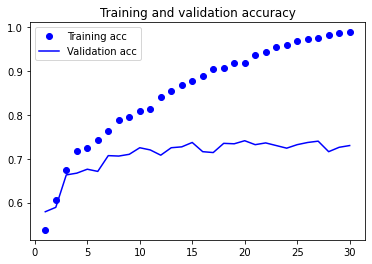

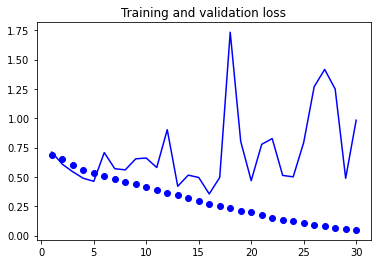

In [75]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.show()

#7. Using data augmentation

##7.1. Setting up data augmentation configuration

In [47]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

## 7.2. Glance at augmented images

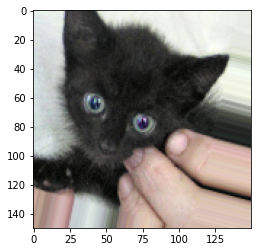

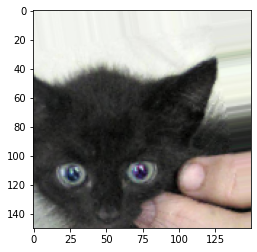

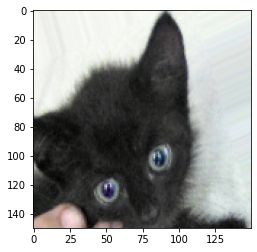

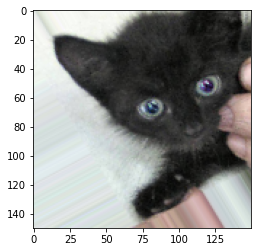

In [50]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

# 8. Defining a new covnet with dropout

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=0.0001), 
              metrics=['acc'])

# 9. Training the covnet using augmented generator

In [55]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [56]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [58]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [59]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 33s 330ms/step - loss: 0.6924 - acc: 0.5382 - val_loss: 0.6821 - val_acc: 0.5133
Epoch 2/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6846 - acc: 0.5616 - val_loss: 0.6825 - val_acc: 0.5747
Epoch 3/100
100/100 [==============================] - 25s 255ms/step - loss: 0.6776 - acc: 0.5672 - val_loss: 0.6460 - val_acc: 0.5799
Epoch 4/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6608 - acc: 0.5991 - val_loss: 0.6038 - val_acc: 0.6237
Epoch 5/100
100/100 [==============================] - 24s 245ms/step - loss: 0.6478 - acc: 0.6215 - val_loss: 0.5949 - val_acc: 0.6650
Epoch 6/100
100/100 [==============================] - 27s 266ms/step - loss: 0.6292 - acc: 0.6417 - val_loss: 0.6509 - val_acc: 0.6392
Epoch 7/100
100/100 [==============================] - 25s 251ms/step - loss: 0.6194 - acc: 0.6561 - val_loss: 0.6817 - val_acc: 0.5787
Epoch 8/100
100/100 [===========================

In [60]:
model.save('cats_and_dogs_small2.h5')

#10. Plot again

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [62]:
epochs = range(1, len(acc)+1)

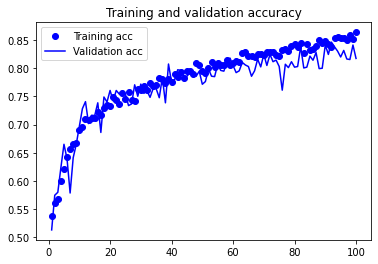

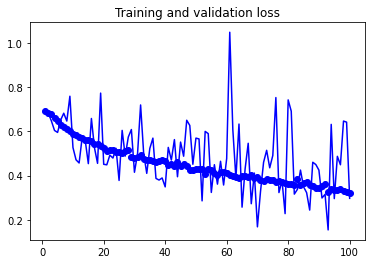

In [63]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.show()